In [4]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("marianeft/diabetes_prediction_dataset")

c:\Users\Lenovo\Desktop\DiabetesPredictorWeb\models-ri-ml\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using the latest cached version of the dataset since marianeft/diabetes_prediction_dataset couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\Lenovo\.cache\huggingface\datasets\marianeft___diabetes_prediction_dataset\default\0.0.0\2ce23948ea40c0c2facb7e0d520f7255b504165c (last modified on Mon Jun 23 18:35:58 2025).


In [5]:
df = ds["train"].to_pandas()

In [6]:
print(df.describe())
# Plotting the distribution of the target variable

                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           14

In [7]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


Text(0.5, 1.0, 'Distribution of Diabetes Outcome')

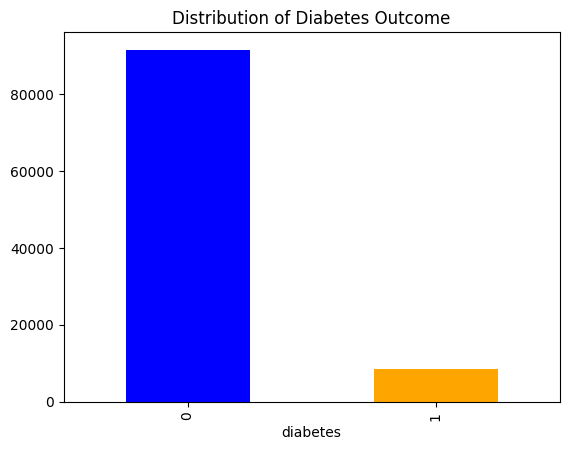

In [8]:
df['diabetes'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Diabetes Outcome')

In [9]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [10]:
dataset=df.copy()

# 

In [11]:
gender_cols = pd.get_dummies(dataset['gender'], prefix='gnd',dtype=int)
dataset = dataset.drop('gender', axis=1)
dataset = pd.concat([dataset, gender_cols], axis=1)


In [12]:
dataset

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gnd_Female,gnd_Male,gnd_Other
0,80.0,0,1,never,25.19,6.6,140,0,1,0,0
1,54.0,0,0,No Info,27.32,6.6,80,0,1,0,0
2,28.0,0,0,never,27.32,5.7,158,0,0,1,0
3,36.0,0,0,current,23.45,5.0,155,0,1,0,0
4,76.0,1,1,current,20.14,4.8,155,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,No Info,27.32,6.2,90,0,1,0,0
99996,2.0,0,0,No Info,17.37,6.5,100,0,1,0,0
99997,66.0,0,0,former,27.83,5.7,155,0,0,1,0
99998,24.0,0,0,never,35.42,4.0,100,0,1,0,0


In [13]:
smoking_cols = pd.get_dummies(dataset['smoking_history'], prefix='smoking',dtype=int)
dataset = dataset.drop('smoking_history', axis=1)
dataset = pd.concat([dataset, smoking_cols], axis=1)

In [14]:
dataset

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gnd_Female,gnd_Male,gnd_Other,smoking_No Info,smoking_current,smoking_ever,smoking_former,smoking_never,smoking_not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,1,0,0,1,0,0,0,0,0
99996,2.0,0,0,17.37,6.5,100,0,1,0,0,1,0,0,0,0,0
99997,66.0,0,0,27.83,5.7,155,0,0,1,0,0,0,0,1,0,0
99998,24.0,0,0,35.42,4.0,100,0,1,0,0,0,0,0,0,1,0


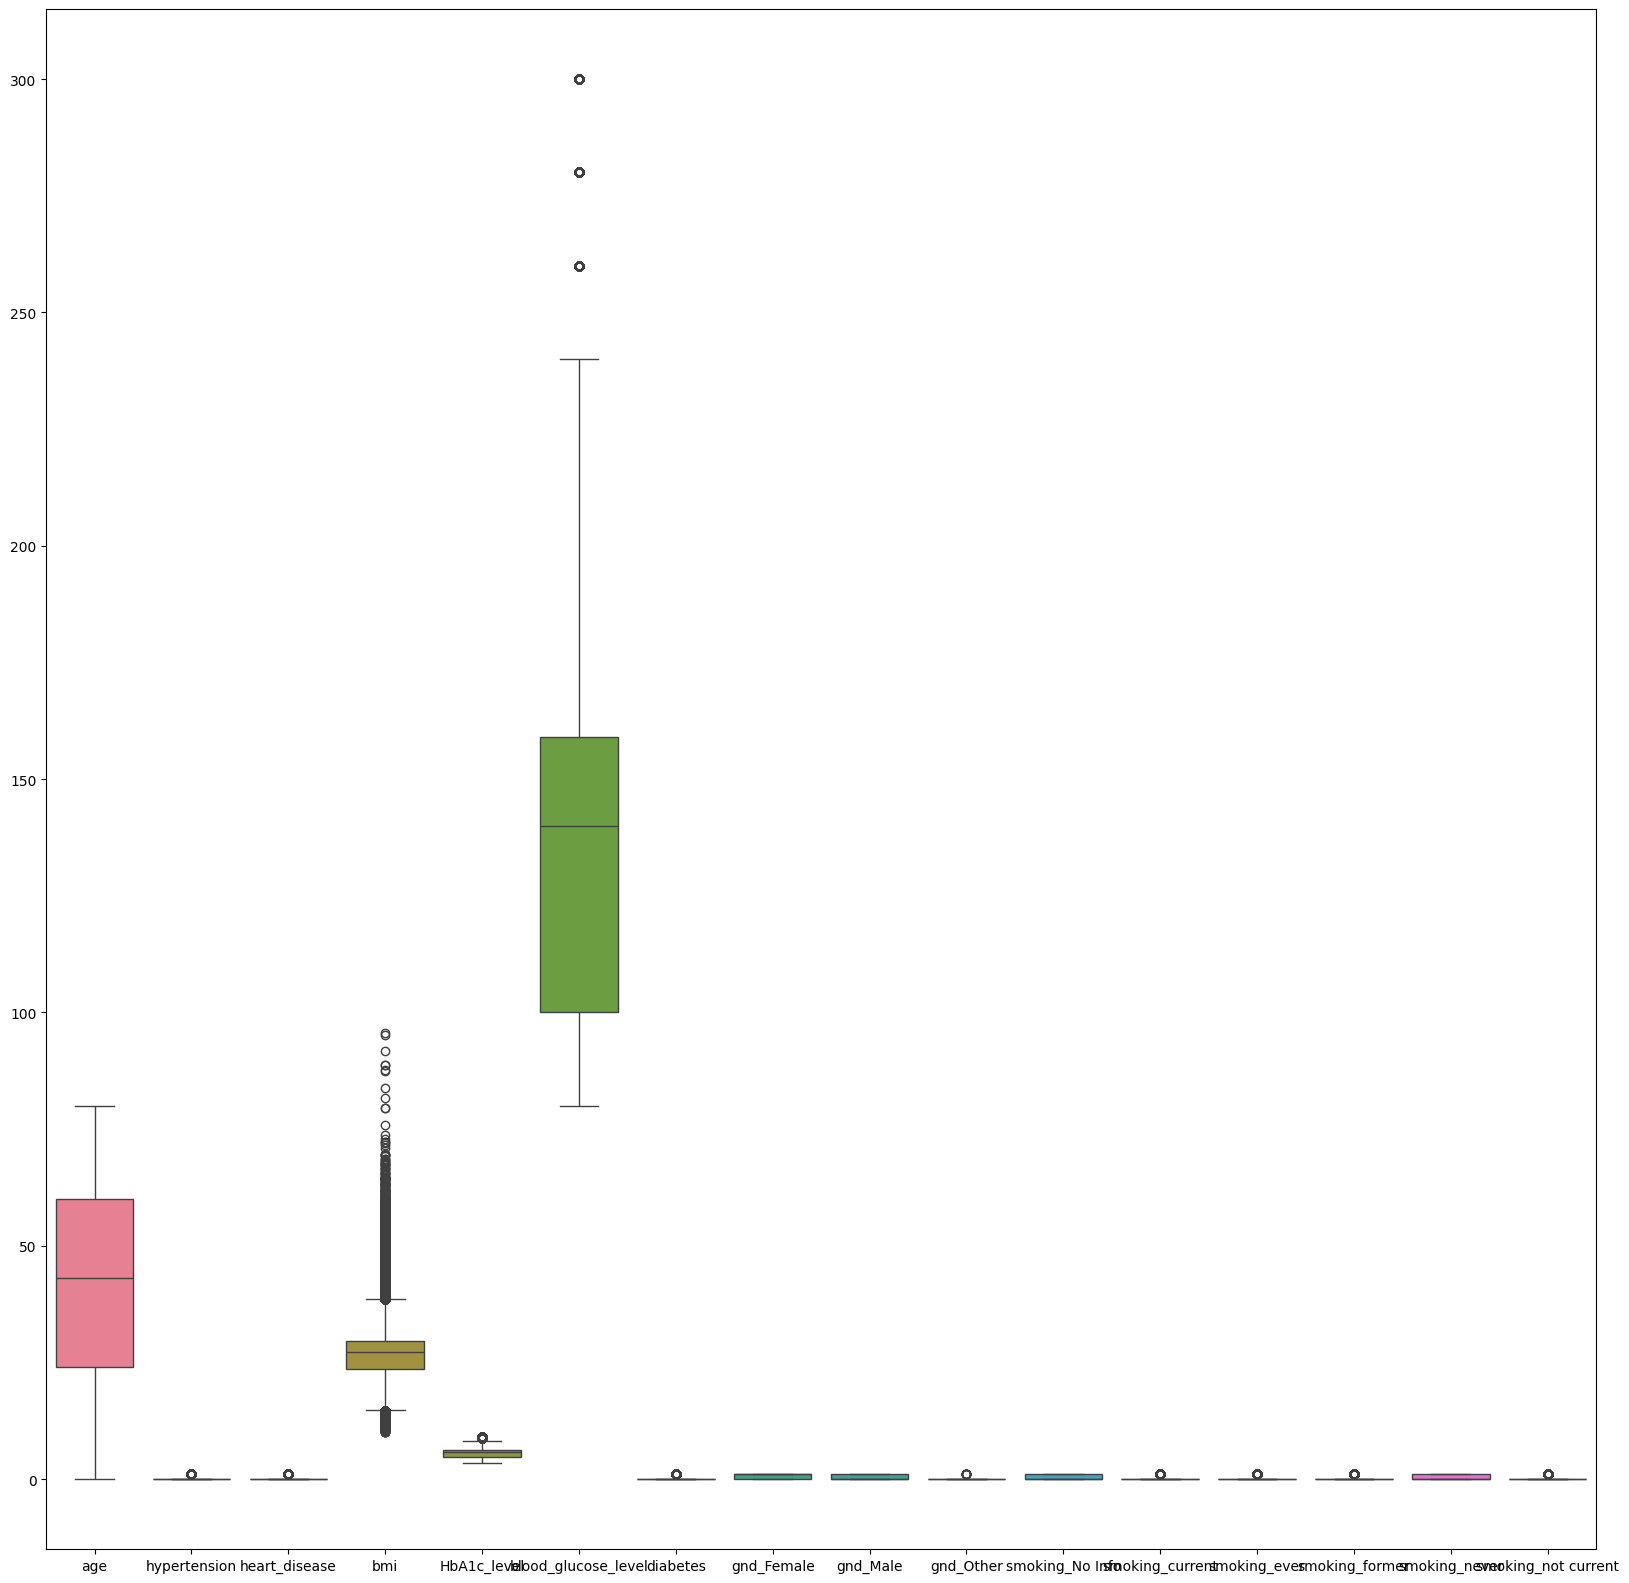

In [15]:
plt.figure(figsize=(20,20))
sns.boxplot(data=dataset)
plt.show()

In [16]:
print(dataset['diabetes'].value_counts())

diabetes
0    91500
1     8500
Name: count, dtype: int64


In [17]:
subset = dataset[dataset['diabetes'] == 0].head(12000)# Create a balanced dataset by taking the last 12000 samples of the negative class
subset
subset2 = dataset[dataset['diabetes'] == 1]
diabetes_data2 = pd.concat([subset, subset2])
diabetes_data2 

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gnd_Female,gnd_Male,gnd_Other,smoking_No Info,smoking_current,smoking_ever,smoking_former,smoking_never,smoking_not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99935,65.0,1,1,33.55,8.2,140,1,1,0,0,0,0,0,0,1,0
99938,55.0,0,1,30.42,6.2,300,1,0,1,0,0,0,0,1,0,0
99957,61.0,0,0,34.45,6.5,280,1,1,0,0,1,0,0,0,0,0
99962,58.0,1,0,38.31,7.0,200,1,1,0,0,0,0,0,0,1,0


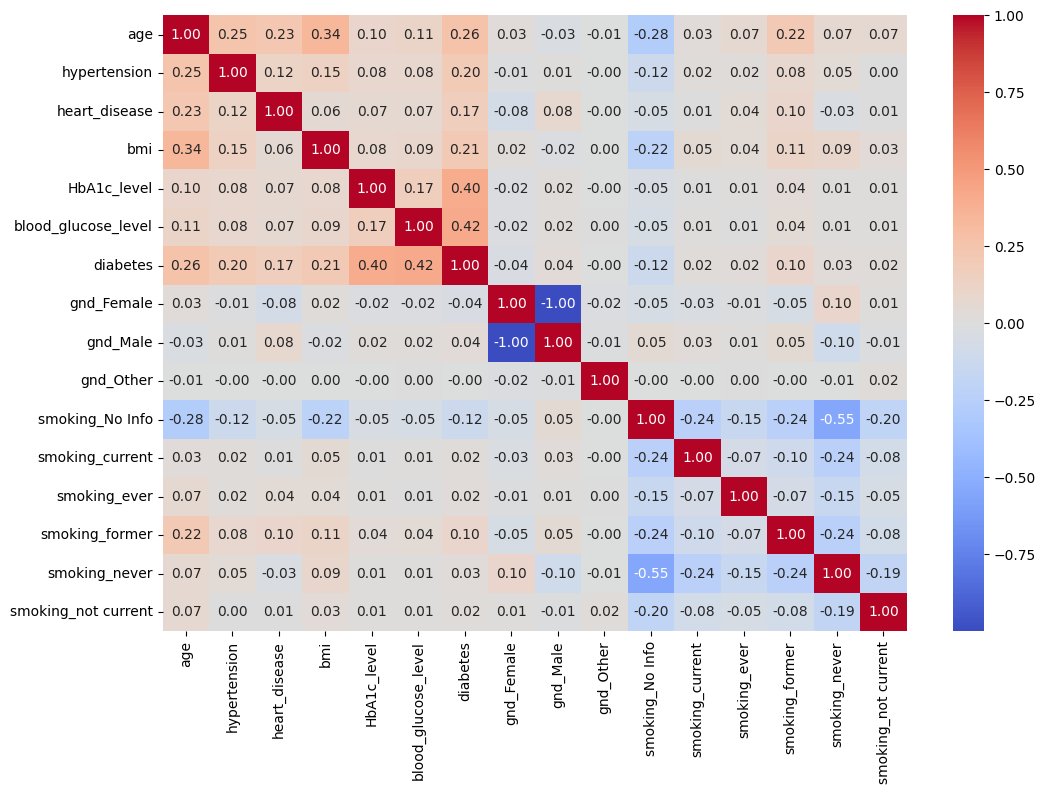

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(dataset.select_dtypes(["int64", "float64"]).corr(), fmt=".2f", cmap="coolwarm", annot=True)
plt.show()

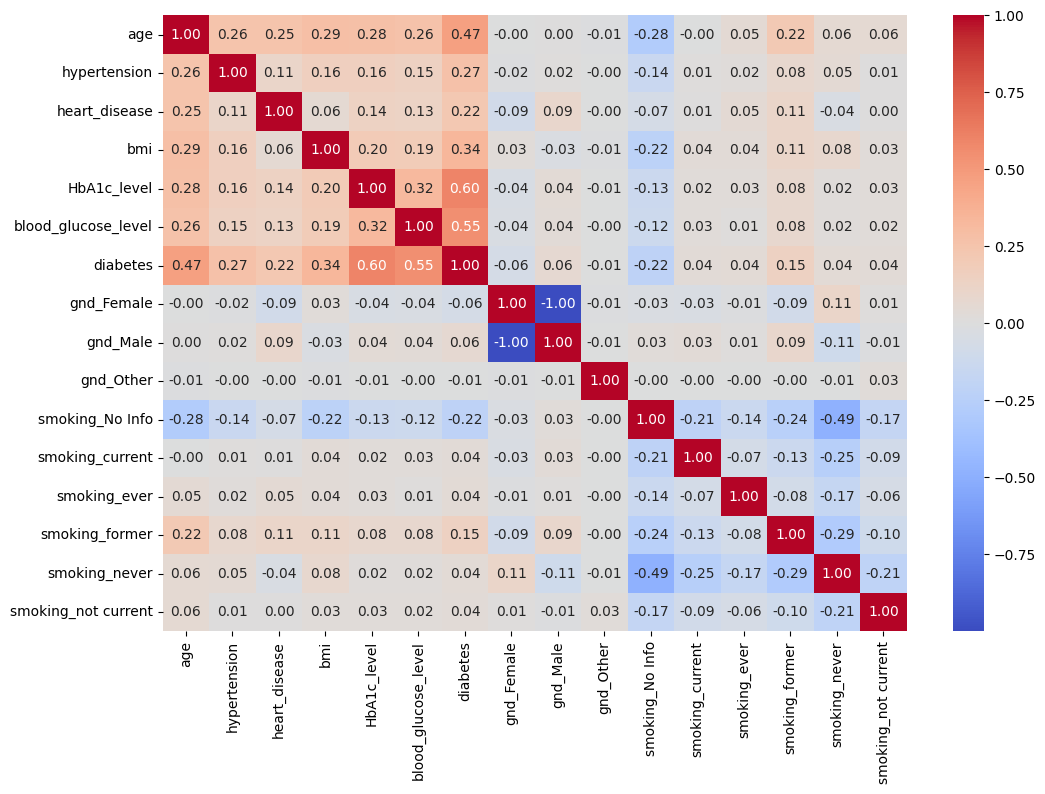

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(diabetes_data2.select_dtypes(["int64", "float64"]).corr(), fmt=".2f", cmap="coolwarm", annot=True)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Suponiendo que la columna objetivo se llama "diabetes"
X = diabetes_data2.drop("diabetes", axis=1)
y = diabetes_data2["diabetes"]

c:\Users\Lenovo\Desktop\DiabetesPredictorWeb\models-ri-ml\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MSE: 0.13121951219512196
R2: 0.4588008530425216


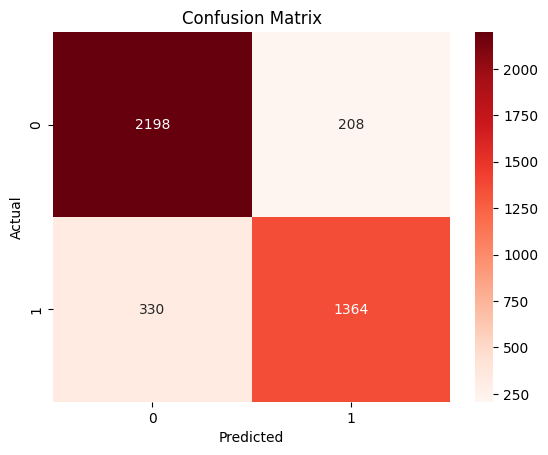

In [21]:


# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("R2:", metrics.r2_score(y_test, y_pred))

conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [22]:
dataset.isna().sum()

age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
gnd_Female             0
gnd_Male               0
gnd_Other              0
smoking_No Info        0
smoking_current        0
smoking_ever           0
smoking_former         0
smoking_never          0
smoking_not current    0
dtype: int64

In [23]:
dataset.info

<bound method DataFrame.info of         age  hypertension  heart_disease    bmi  HbA1c_level  \
0      80.0             0              1  25.19          6.6   
1      54.0             0              0  27.32          6.6   
2      28.0             0              0  27.32          5.7   
3      36.0             0              0  23.45          5.0   
4      76.0             1              1  20.14          4.8   
...     ...           ...            ...    ...          ...   
99995  80.0             0              0  27.32          6.2   
99996   2.0             0              0  17.37          6.5   
99997  66.0             0              0  27.83          5.7   
99998  24.0             0              0  35.42          4.0   
99999  57.0             0              0  22.43          6.6   

       blood_glucose_level  diabetes  gnd_Female  gnd_Male  gnd_Other  \
0                      140         0           1         0          0   
1                       80         0           1     

Accuracy: 0.9009756097560976

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92      2406
           1       0.90      0.86      0.88      1694

    accuracy                           0.90      4100
   macro avg       0.90      0.89      0.90      4100
weighted avg       0.90      0.90      0.90      4100



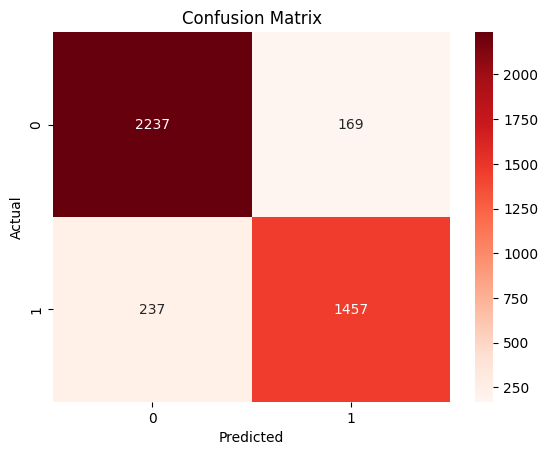

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Classification model
model = RandomForestClassifier(random_state=42 , criterion = 'log_loss' )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()




Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92      2406
           1       0.90      0.86      0.88      1694

    accuracy                           0.90      4100
   macro avg       0.90      0.89      0.90      4100
weighted avg       0.90      0.90      0.90      4100



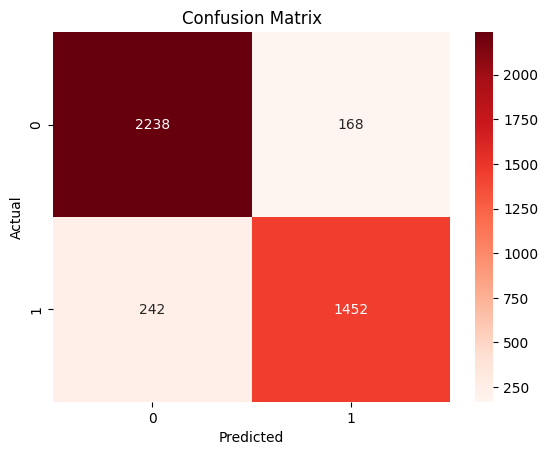

In [27]:
from sklearn.preprocessing import RobustScaler

# 1. Instancia el escalador y ajústalo solo con los datos de entrenamiento
scaler = RobustScaler()
scaler.fit(X_train)

# 2. Transforma los datos de entrenamiento y prueba
#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# 3. Usa los datos escalados para entrenar y evaluar tus modelos
model = RandomForestClassifier(random_state=42, criterion='gini')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# ... el resto de tu código de métricas y visualización ...
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))

conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Accuracy (SVC): 0.8882926829268293
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2406
           1       0.89      0.83      0.86      1694

    accuracy                           0.89      4100
   macro avg       0.89      0.88      0.88      4100
weighted avg       0.89      0.89      0.89      4100



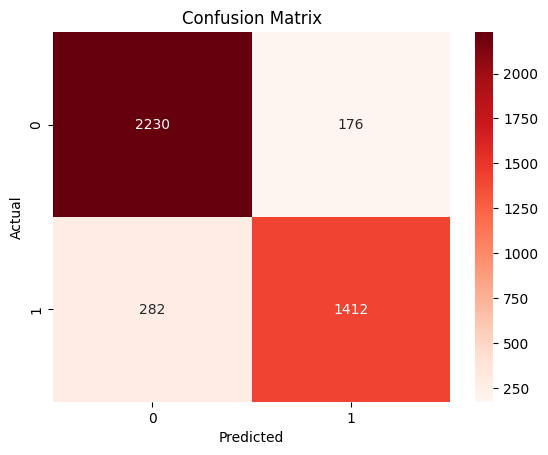

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Entrenar el modelo SVC
svc = SVC(kernel='linear', probability=True, random_state=42)
svc.fit(X_train, y_train)

# Predicciones
y_pred_svc = svc.predict(X_test)

# Evaluación
print("Accuracy (SVC):", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

conf_mat = metrics.confusion_matrix(y_test, y_pred_svc)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()